<a href="https://colab.research.google.com/github/suyashss/nn_test/blob/master/GANtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import tensorflow.keras as keras

In [0]:
import matplotlib.pyplot as plt
def display_images(images,n):
  #print(images.shape)
  fig = plt.figure(figsize=(n*1.5,3))
  for i in range(n):
    img = images[i,:,:]
    plt.subplot(1,n,i+1)
    plt.imshow(img,cmap="binary")
    plt.axis("off")
  plt.show()    

In [0]:
(x_train,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()

In [0]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

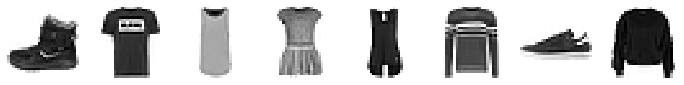

In [44]:
display_images(x_train,8)

In [19]:
type(x_train[0,0][0])

numpy.float32

In [41]:
x_train.shape

(60000, 28, 28)

In [0]:
import numpy as np

In [0]:
codings_size = 30

In [0]:
generator = keras.models.Sequential([
                                     keras.layers.Dense(100,activation="selu",input_shape=[codings_size]),
                                     keras.layers.Dense(150,activation="selu"),
                                     keras.layers.Dense(28*28,activation="sigmoid"),
                                     keras.layers.Reshape([28,28])
])

In [0]:
discriminator = keras.models.Sequential([
                                         keras.layers.Flatten(input_shape=[28,28]),
                                          keras.layers.Dense(150,activation="selu"),
                                      keras.layers.Dense(100,activation="selu"),
                                      keras.layers.Dense(1,activation="sigmoid"),
])

In [0]:
gan = keras.models.Sequential([generator,discriminator])

In [0]:
discriminator.compile(loss="binary_crossentropy",optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy",optimizer="rmsprop")

In [0]:
batch_size = 32

In [0]:
dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(1000)
dataset = dataset.batch(batch_size,drop_remainder=True).prefetch(1)

In [0]:
def train_gan(gan,dataset,batch_size,codings_size,n_epochs=50):
  generator,discriminator = gan.layers
  for epoch in range(n_epochs):
    for X_batch in dataset:
      # Train discriminator
      noise = tf.random.normal(shape=[batch_size,codings_size])
      generated_images = generator(noise)
      display_images(generated_images,8)
      X_fake_and_real = tf.concat([generated_images,X_batch],axis=0)
      y1 = tf.constant([[0.]]*batch_size + [[1.]]*batch_size)
      discriminator.trainable = True
      discriminator.train_on_batch(X_fake_and_real,y1)
      # Train the generator
      noise = tf.random.normal(shape=[batch_size,codings_size])
      y2 = tf.constant([[1.]]*batch_size)
      discriminator.trainable = False
      gan.train_on_batch(noise,y2)

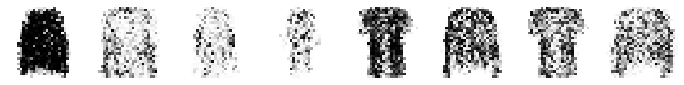

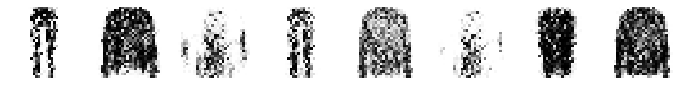

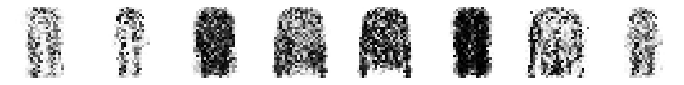

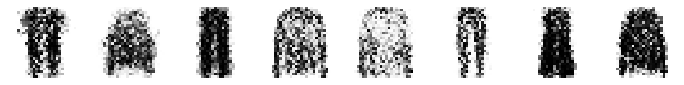

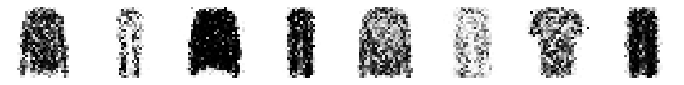

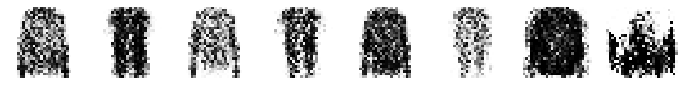

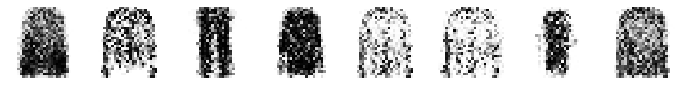

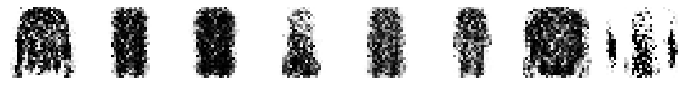

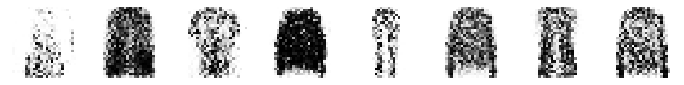

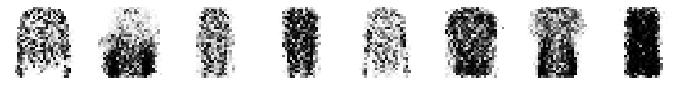

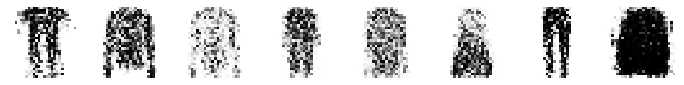

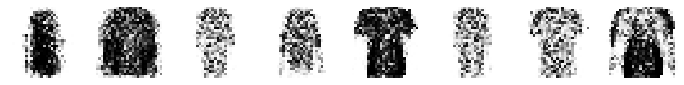

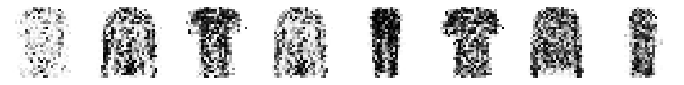

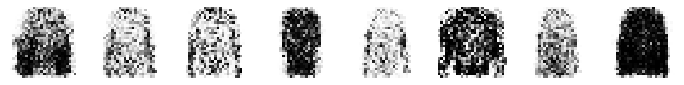

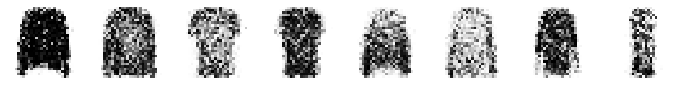

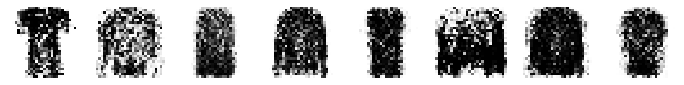

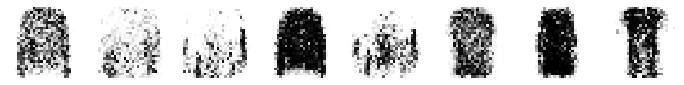

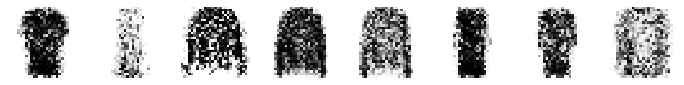

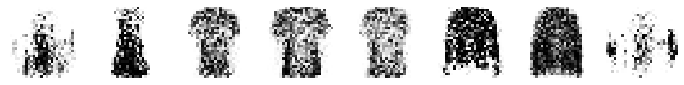

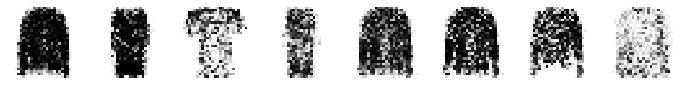

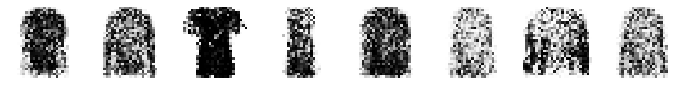

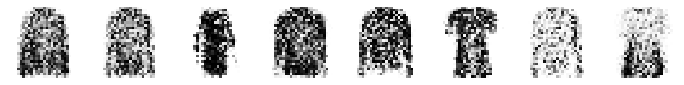

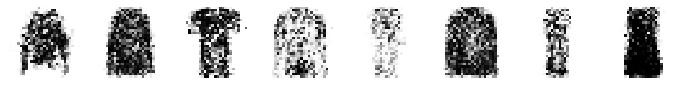

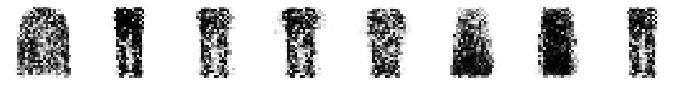

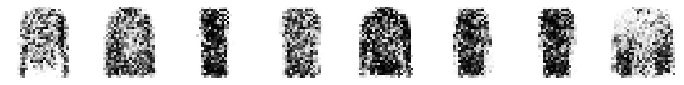

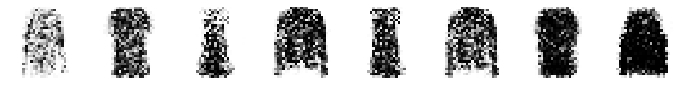

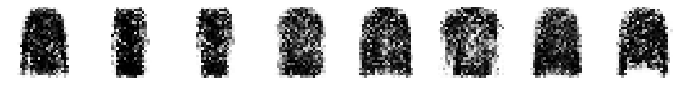

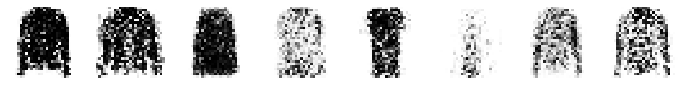

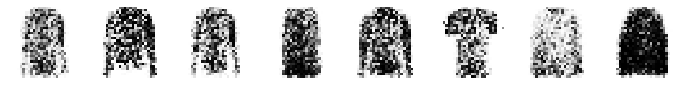

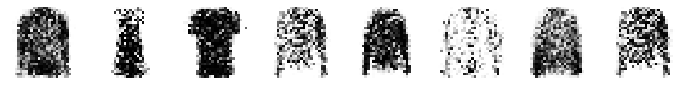

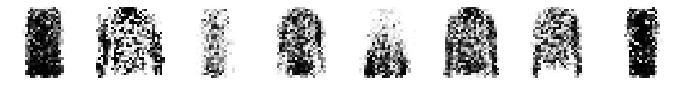

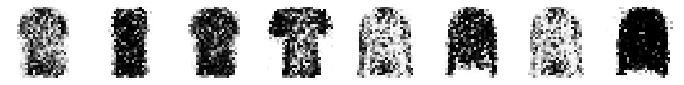

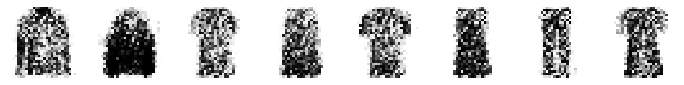

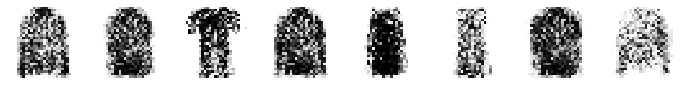

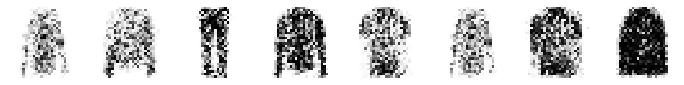

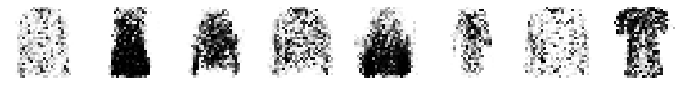

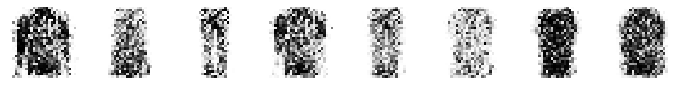

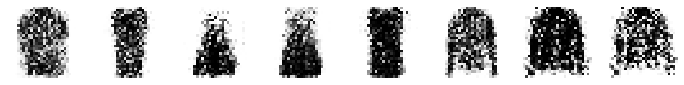

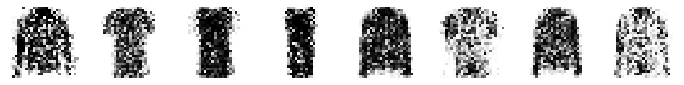

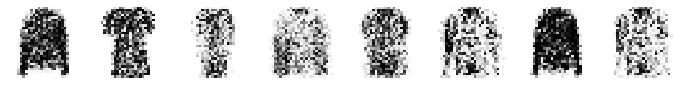

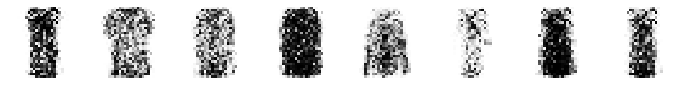

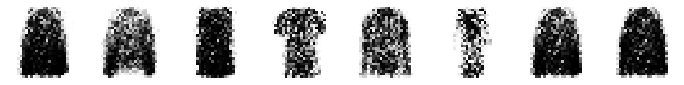

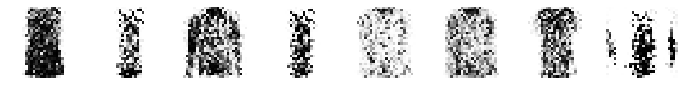

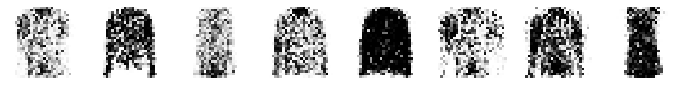

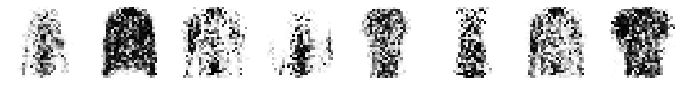

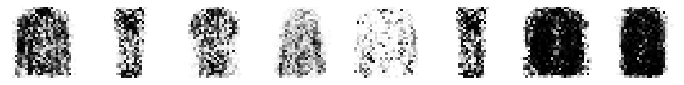

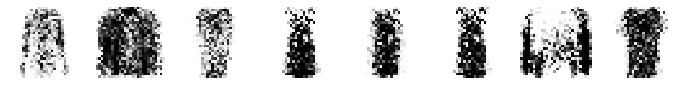

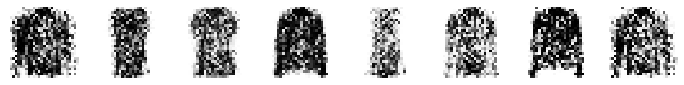

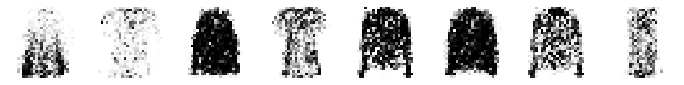

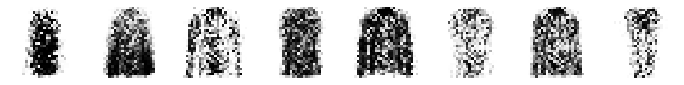

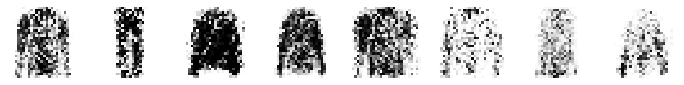

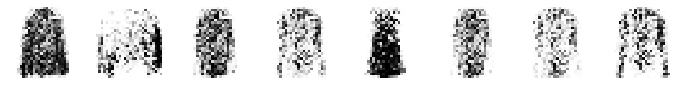

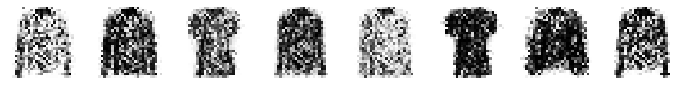

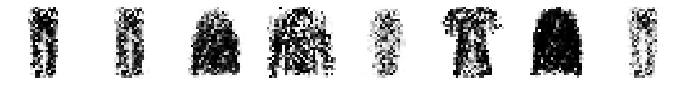

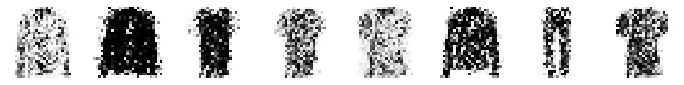

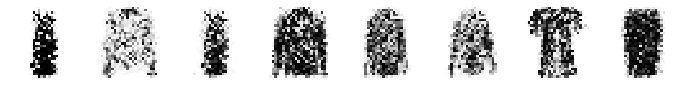

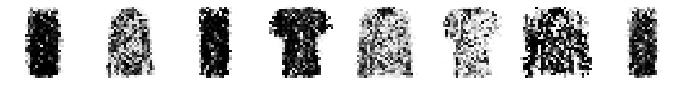

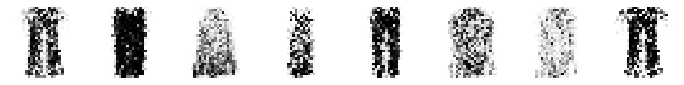

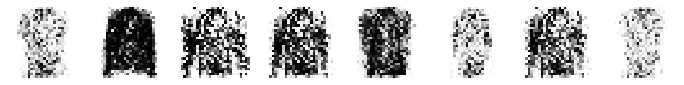

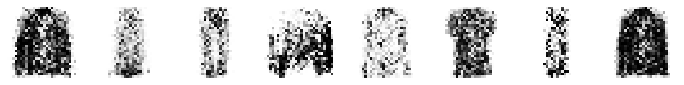

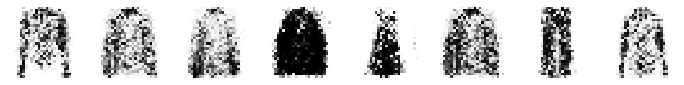

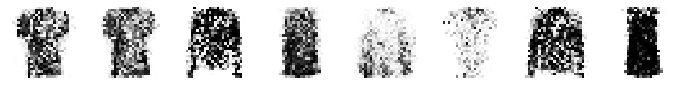

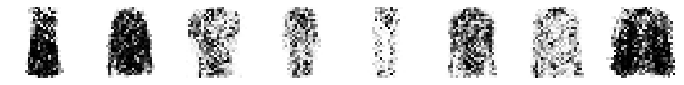

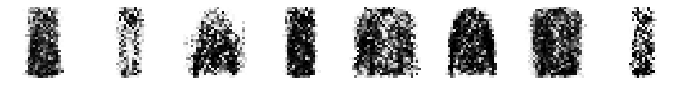

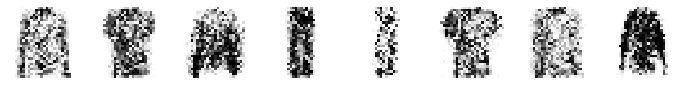

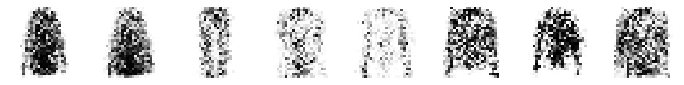

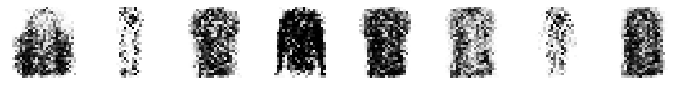

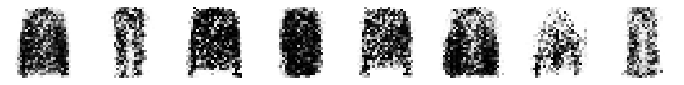

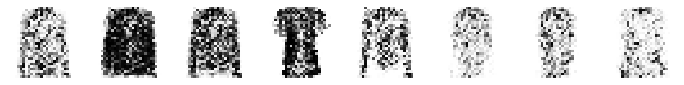

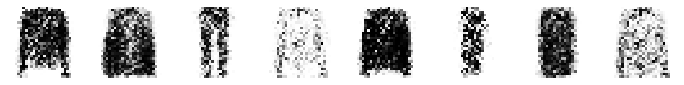

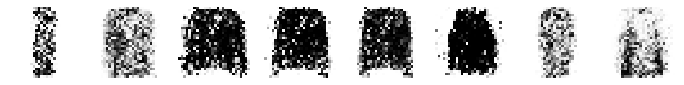

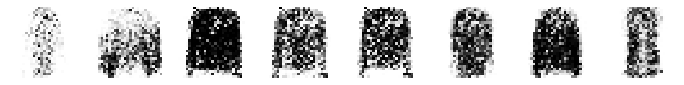

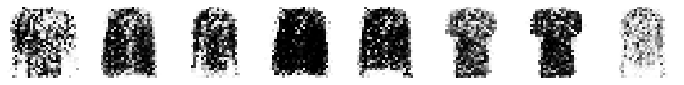

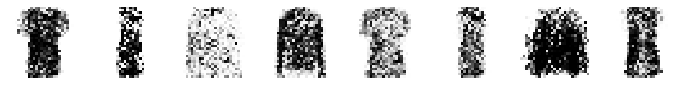

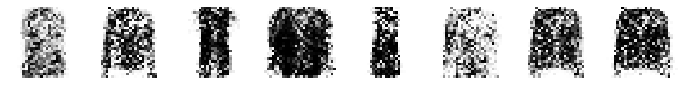

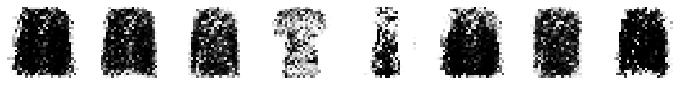

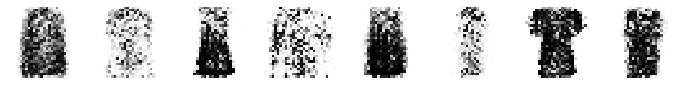

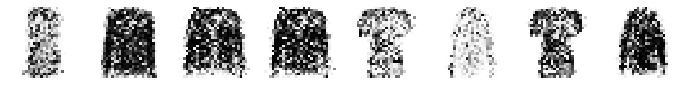

KeyboardInterrupt: ignored

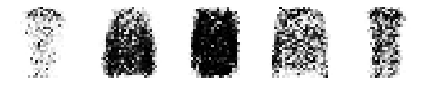

In [40]:
train_gan(gan,dataset,batch_size,codings_size,10)